In [1]:
import pandas as pd
import librosa as lb
import os
from IPython.display import Audio
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pathlib
from pathlib import Path
import random
import soundfile as sf
import matplotlib

In [2]:
path_ruido = r'F:\common_voice\Proyecto\ruido_samples'
audios = r'F:\common_voice\Proyecto\audios\{}'
clips = r'F:\common_voice\Proyecto\audios\{}\clips'
idiomas = ['ar','es','fr']

In [3]:
os.listdir(path_ruido)

['08-44-09 Unknown 90,6375 MHz.wav',
 '08-45-17 Unknown 60,7375 MHz.wav',
 '08-47-31 Unknown 43,19769 MHz.wav',
 '08-49-20 Unknown 54,217 MHz.wav',
 '08-51-28 Unknown 88,225 MHz.wav',
 '08-53-17 Unknown 90,2875 MHz.wav',
 '08-56-24 Unknown 240,000 MHz.wav',
 '09-01-11 Unknown 162,270736 MHz.wav',
 '10-07-30 Unknown 57,570 MHz.wav',
 '10-40-06 Unknown 87,480 MHz.wav',
 '10-41-37 Unknown 87,4875 MHz.wav',
 '10-47-35 Unknown 87,925 MHz.wav',
 '10-57-43 Unknown 87,300 MHz.wav',
 '11-11-58 Unknown 86,403 MHz.wav',
 '11-55-53 Unknown 86,400 MHz.wav',
 '12-07-23 Unknown 88,2625 MHz.wav',
 '129,125 MHz_12-17-37.wav',
 '38,39986 MHz_11-37-01.wav',
 '51,31792 MHz_11-21-06.wav',
 '62,7125 MHz_12-33-36.wav',
 '91,9125 MHz_11-07-53.wav',
 '93,825 MHz_11-04-41.wav']

In [4]:
clips_ruido = [os.path.join(path_ruido,i) for i in os.listdir(path_ruido)]

In [6]:
csv_es = pd.read_csv(os.path.join(audios.format('es'),
                                  'validated.tsv'),sep='\t')[['path','sentence']]

In [7]:
csv_es['id_audio'] = csv_es['path'].str.split('_')
csv_es['id_audio'] = csv_es['id_audio'].map(lambda x: x[-1].split('.')[0])
csv_es['path'] = csv_es['path'].map(lambda x : os.path.join(clips.format('es'),x))

In [8]:
lb.load(csv_es['path'][1])

(array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        -8.1528133e-13, -3.8103453e-13,  0.0000000e+00], dtype=float32),
 22050)

In [9]:
y, sr = lb.load(csv_es['path'][1])
Audio(y, rate=sr)

In [10]:
z, sr = lb.load(clips_ruido[2])
Audio(z, rate=sr)

In [11]:
print(y.shape)

(151352,)


In [12]:
z_rec = z[:y.shape[0]]

In [13]:
i = 0.2

In [14]:
Audio((i*z_rec + (1-i)*y)/ 2,rate = sr) 

In [24]:

audios = [os.path.join(r'F:\common_voice\Proyecto\Scripts\data_proc\audios_proc',i) for i in os.listdir(r'F:\common_voice\Proyecto\Scripts\data_proc\audios_proc')]
ruidos = [os.path.join(r'F:\common_voice\Proyecto\Scripts\data_proc\ruidos_proc',i) for i in os.listdir(r'F:\common_voice\Proyecto\Scripts\data_proc\ruidos_proc')]

In [20]:
juntos = ruidos.extend(audios)

In [36]:

plot_dataset = random.sample(ruidos,6)+random.sample(audios, 6)

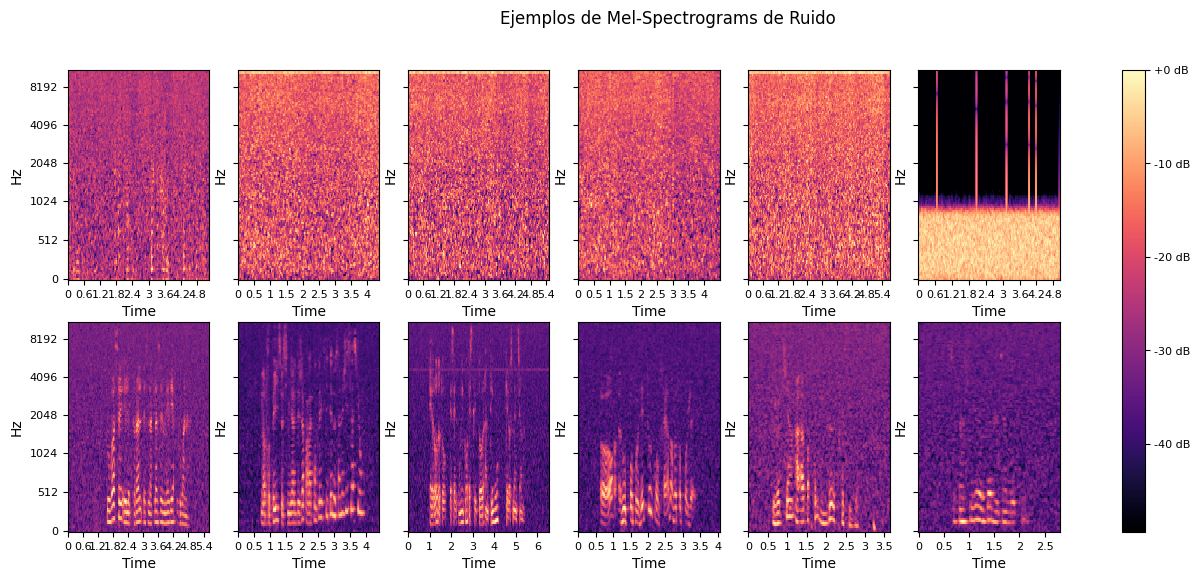

In [37]:
fig, axes = plt.subplots(2, 6, figsize=(16,6), sharex=False, sharey=True)

fig.suptitle("Ejemplos de Mel-Spectrograms de Ruido")

for i, ax in enumerate(axes.flat):
    try:
        # Cargar audio
        y, sr = librosa.load(plot_dataset[i], sr=None)
        
        # Calcular el mel-espectrograma
        mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
        mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
        
        # Mostrar el mel-espectrograma
        img = librosa.display.specshow(mel_spec_db, sr=sr, x_axis='time', y_axis='mel', ax=ax)
        #ax.set_title('Audio {}'.format(i+1))
        matplotlib.rc('xtick', labelsize=8) 
        matplotlib.rc('ytick', labelsize=8) 
    except Exception as e:
        #ax.set_title(f"Error en {audios_plot[i]}")
        print(f"Error al procesar {plot_dataset[i]}: {e}")

# Agregar barra de color
fig.colorbar(img, ax=axes, format='%+2.0f dB')
#plt.tight_layout()
plt.show()

In [ ]:


S = librosa.feature.melspectrogram(y=(i*z_rec + (1-i)*y), sr=sr, n_mels=128, fmax=sr//2)
S_db = librosa.amplitude_to_db(S, ref=np.max)  # Convertir a escala dB

# Graficar el Mel spectrograma
plt.figure(figsize=(10, 4))
librosa.display.specshow(S_db, sr=sr, x_axis="time", y_axis="mel", fmax=sr//2, cmap="magma")
plt.colorbar(format="%+2.0f dB")
plt.title("Mel Spectrogram")
plt.xlabel("Tiempo (s)")
plt.ylabel("Frecuencia (Bancos Mel)")
plt.show()

NameError: name 'librosa' is not defined

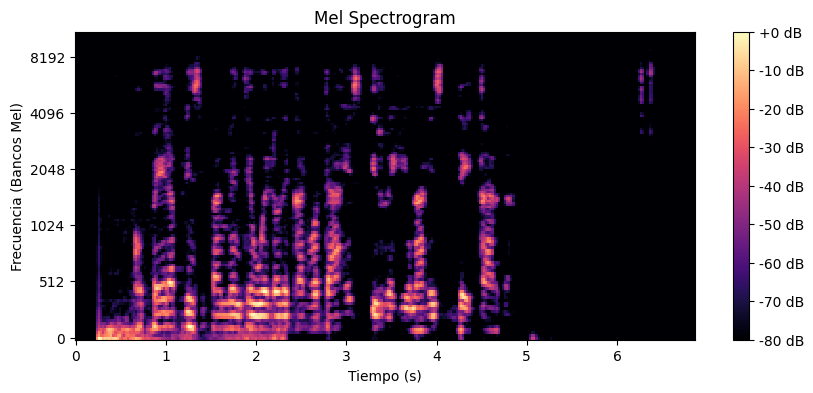

In [16]:
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=sr//2)
S_db = librosa.amplitude_to_db(S, ref=np.max)  # Convertir a escala dB

# Graficar el Mel spectrograma
plt.figure(figsize=(10, 4))
librosa.display.specshow(S_db, sr=sr, x_axis="time", y_axis="mel", fmax=sr//2, cmap="magma")
plt.colorbar(format="%+2.0f dB")
plt.title("Mel Spectrogram")
plt.xlabel("Tiempo (s)")
plt.ylabel("Frecuencia (Bancos Mel)")
plt.show()

In [ ]:
def unir_csv(idiomas, num_muestras):
    csv_0 = None
    for i in idiomas:
        
        ## Leemos tsv
        csv = pd.read_csv(os.path.join(audios.format(i),
                                  'validated.tsv'),sep='\t')[['path','sentence']]
        
        # Separamos el id del audio del path
        csv['id_audio'] = csv['path'].str.split('_').map(lambda x: x[-1].split('.')[0])
        
        # Extraemos el idioma
        csv['idioma'] = csv['path'].str.split('_').str[2]
        
        # Verificamos los que están dentro del conjunto descargado
        csv['presente'] = csv['path'].isin(os.listdir(clips.format(i)))
        
        # Cambiamos de paths relativos a absolutos
        csv['path'] = csv['path'].map(lambda x : os.path.join(clips.format(i),x))
        
        #Filtramos los que no están descargados
        csv = csv[csv['presente'] == True]
        
        #Eliminamos las columnas que no son de interés
        csv = csv[['idioma','id_audio','path','sentence']]
        
        
        csv_0 = pd.concat([csv_0,csv],ignore_index=True)
    
    #Seleccionamos el número deseado de muestras por idioma.
    csv_0 = csv_0.groupby('idioma').apply(lambda x: x.sample(num_muestras)).reset_index(drop=True)
    return csv_0

In [18]:
csv_unidos = unir_csv(idiomas,1000)
csv_unidos.to_csv('audios_proc/unidos.csv')

C:\Users\Pedro\AppData\Local\Temp\ipykernel_11144\1279546072.py:6: DtypeWarning: Columns (9,12) have mixed types. Specify dtype option on import or set low_memory=False.
  csv = pd.read_csv(os.path.join(audios.format(i),
C:\Users\Pedro\AppData\Local\Temp\ipykernel_11144\1279546072.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  csv_0 = csv_0.groupby('idioma').apply(lambda x: x.sample(num_muestras)).reset_index(drop=True)


In [19]:
csv_unidos.iloc[0,2]

'F:\\common_voice\\Proyecto\\audios\\ar\\clips\\common_voice_ar_24056135.mp3'

In [22]:
def add_noise(df, lista_ruido):
    sr = 22050
    carpeta_destino = Path(r'F:\common_voice\Proyecto\Scripts\audios_proc')
    path_new = []
    prop_ruido = []
    for _, row in df.iterrows():
        prop_ruido_audio = random.randint(15,30)/100

        y, _ = lb.load(row.iloc[2], sr=sr)
        z, _ = lb.load(random.choice(lista_ruido))

        inicio = random.randint(0, z.shape[0]-y.shape[0])

        z_cortado = z[inicio:inicio+y.shape[0]]  

        audio_con_ruido = (y*(1-prop_ruido_audio)+z_cortado*prop_ruido_audio)/2

        name_file = Path(row.iloc[2]).name
        name_file = str(name_file).split('.')[0] + '_' + str(int(prop_ruido_audio*100)) + '.mp3'
        path_new += str(carpeta_destino / name_file)
        prop_ruido.append(prop_ruido_audio)
        sf.write(file= carpeta_destino / name_file, data = audio_con_ruido, samplerate=sr)
        

In [ ]:
import random
import librosa as lb
import soundfile as sf
from pathlib import Path
import pandas as pd
import multiprocessing as mp

def procesar_audio(row, lista_ruido, carpeta_destino, sr=22050):
    """Agrega ruido a un solo audio y guarda el archivo procesado."""
    print(1)
    prop_ruido_audio = random.randint(15, 30) / 100

    # Cargar el audio original
    y, _ = lb.load(row.iloc[2], sr=sr)
    
    # Cargar un ruido aleatorio
    z, _ = lb.load(random.choice(lista_ruido), sr=sr)

    # Seleccionar un fragmento aleatorio del ruido
    inicio = random.randint(0, z.shape[0] - y.shape[0])
    z_cortado = z[inicio:inicio + y.shape[0]]

    # Mezclar audio y ruido
    audio_con_ruido = (y * (1 - prop_ruido_audio) + z_cortado * prop_ruido_audio) / 2

    # Definir el nuevo nombre del archivo
    name_file = Path(row.iloc[2]).stem + f'_{int(prop_ruido_audio * 100)}.mp3'
    path_final = str(carpeta_destino / name_file)

    # Guardar el audio procesado
    print(2)
    sf.write(file=path_final, data=audio_con_ruido, samplerate=sr)

    return (path_final, prop_ruido_audio)

def add_noise_parallel(df, lista_ruido):
    """Aplica ruido a los audios en paralelo y devuelve el DataFrame actualizado."""
    carpeta_destino = r'F:\common_voice\Proyecto\Scripts\audios_proc'
    
    with mp.Pool(processes=mp.cpu_count()) as pool:
        print(3)
        results = pool.starmap(procesar_audio, [(row, lista_ruido, carpeta_destino) for _, row in df.iterrows()])

    # Separar los resultados en dos listas
    paths, props = zip(*results)

    df['new_path'] = paths
    df['noise_prop'] = props

    return df

In [ ]:
fr = pd.read_csv(r'F:\common_voice\Proyecto\audios\fr\validated.tsv', sep= '\t')

In [ ]:
fr = fr[['path','sentence']]

In [ ]:
fr['id'] = fr['path'].str.split('_').str[-1].str.split('.').str[0]

C:\Users\Pedro\AppData\Local\Temp\ipykernel_17152\1272932085.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fr['id'] = fr['path'].str.split('_').str[-1].str.split('.').str[0]


In [ ]:
fr.sort_values(by = 'id').to_csv('prueba_fr.csv')

In [5]:
print(clips_ruido)

['F:\\common_voice\\Proyecto\\ruido_samples\\08-44-09 Unknown 90,6375 MHz.wav', 'F:\\common_voice\\Proyecto\\ruido_samples\\08-45-17 Unknown 60,7375 MHz.wav', 'F:\\common_voice\\Proyecto\\ruido_samples\\08-47-31 Unknown 43,19769 MHz.wav', 'F:\\common_voice\\Proyecto\\ruido_samples\\08-49-20 Unknown 54,217 MHz.wav', 'F:\\common_voice\\Proyecto\\ruido_samples\\08-51-28 Unknown 88,225 MHz.wav', 'F:\\common_voice\\Proyecto\\ruido_samples\\08-53-17 Unknown 90,2875 MHz.wav', 'F:\\common_voice\\Proyecto\\ruido_samples\\08-56-24 Unknown 240,000 MHz.wav', 'F:\\common_voice\\Proyecto\\ruido_samples\\09-01-11 Unknown 162,270736 MHz.wav', 'F:\\common_voice\\Proyecto\\ruido_samples\\10-07-30 Unknown 57,570 MHz.wav', 'F:\\common_voice\\Proyecto\\ruido_samples\\10-40-06 Unknown 87,480 MHz.wav', 'F:\\common_voice\\Proyecto\\ruido_samples\\10-41-37 Unknown 87,4875 MHz.wav', 'F:\\common_voice\\Proyecto\\ruido_samples\\10-47-35 Unknown 87,925 MHz.wav', 'F:\\common_voice\\Proyecto\\ruido_samples\\10-57-43

In [29]:
import uuid


def procesar_ruido(lista_ruido,ruta_audios):
    """ """
    sr = 22050
    for i in lista_ruido:
        indice = 0
        y, _ = librosa.load(i)
        while indice < len(y):
            duracion = int(random.randint(400,700)*sr/100)
            if indice + duracion > len(y):
                break
            new_audio = y[indice:indice+duracion]
            sf.write(os.path.join(ruta_audios,uuid.uuid4().hex+'_ruido.mp3'),new_audio,sr)
            indice += duracion 

In [30]:
ruta_ruido_proc = r'F:\common_voice\Proyecto\Scripts\ruidos_proc'

In [31]:
procesar_ruido(clips_ruido,ruta_ruido_proc)

In [10]:
ruta_ruidos = [i for i in Path(r'F:\common_voice\Proyecto\Scripts\data_proc\ruidos_proc').iterdir()]

In [12]:
from random import sample

audios_plot = sample(ruta_ruidos,6)

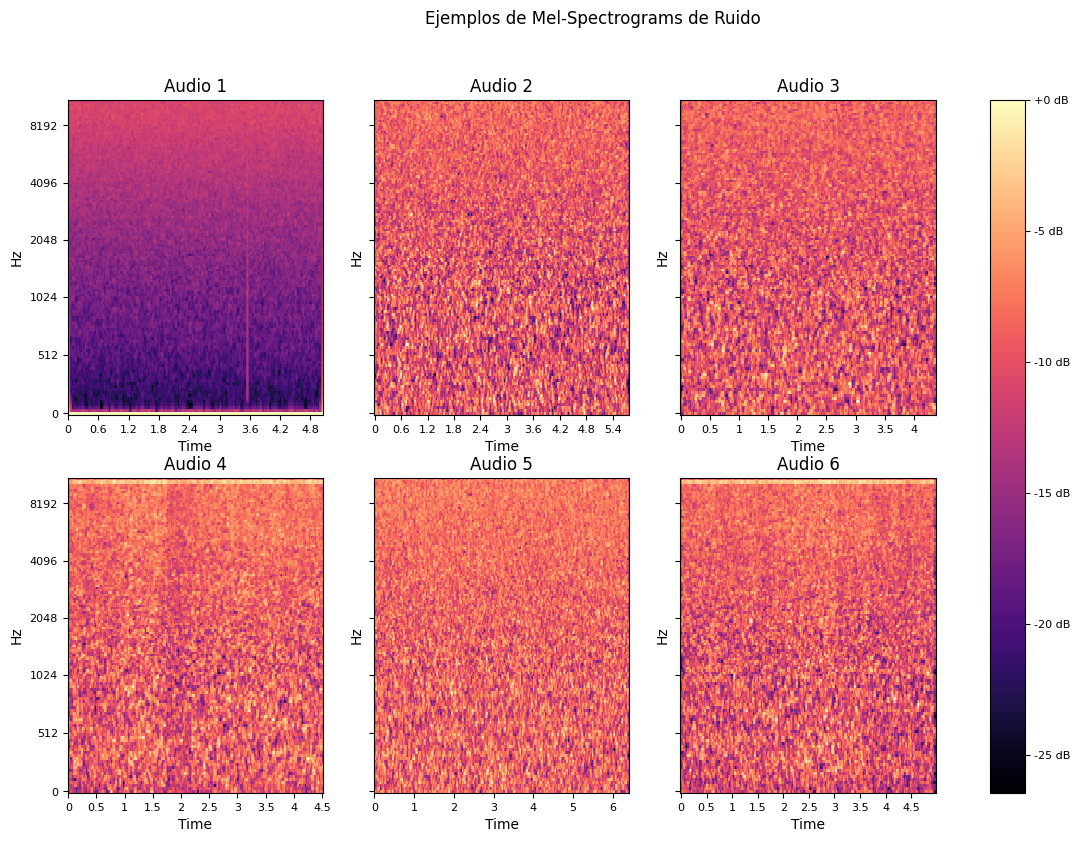

In [36]:
fig, axes = plt.subplots(2, 3, figsize=(14, 9), sharex=False, sharey=True)

fig.suptitle("Ejemplos de Mel-Spectrograms de Ruido")

for i, ax in enumerate(axes.flat):
    try:
        # Cargar audio
        y, sr = librosa.load(audios_plot[i], sr=None)
        
        # Calcular el mel-espectrograma
        mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
        mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
        
        # Mostrar el mel-espectrograma
        img = librosa.display.specshow(mel_spec_db, sr=sr, x_axis='time', y_axis='mel', ax=ax)
        ax.set_title('Audio {}'.format(i+1))
        matplotlib.rc('xtick', labelsize=8) 
        matplotlib.rc('ytick', labelsize=8) 
    except Exception as e:
        #ax.set_title(f"Error en {audios_plot[i]}")
        print(f"Error al procesar {audios_plot[i]}: {e}")

# Agregar barra de color
fig.colorbar(img, ax=axes, format='%+2.0f dB')
#plt.tight_layout()
plt.show()


In [4]:
spanish = pd.read_csv(r'F:\common_voice\Proyecto\audios\es\validated.tsv', sep='\t')

In [ ]:
spanish

Index(['client_id', 'path', 'sentence', 'up_votes', 'down_votes', 'age',
       'gender', 'accent'],
      dtype='object')

In [6]:
spanish = spanish[['sentence', 'path']]

In [7]:
spanish

sentence  \
0               Habita en aguas poco profundas y rocosas.   
1       Opera principalmente vuelos de cabotaje y regi...   
2        Para visitar contactar primero con la dirección.   
3       Realizó los estudios primarios en Francia, par...   
4       En los años que siguieron, este trabajo Espart...   
...                                                   ...   
112122  No es correcto sostener que la evolución jamás...   
112123  En los siguientes años lanzó varios sencillos ...   
112124  El software que usa es Slash y es software libre.   
112125  Este sistema es actualmente muy utilizado para...   
112126  Fue, además, maestro de escuela y jefe polític...   

                                path  
0       common_voice_es_19698530.mp3  
1       common_voice_es_19987333.mp3  
2       common_voice_es_19691402.mp3  
3       common_voice_es_19966634.mp3  
4       common_voice_es_19600147.mp3  
...                              ...  
112122  common_voice_es_20110857.mp3  
112123  common_voice_es_20110865.mp3  
112124  common_voice_es_20110870.mp3  
112125  common_voice_es_20110872.mp3  
112126  common_voice_es_20110889.mp3  

[112127 rows x 2 columns]

In [ ]:
path_largo = [os.path.join(r'F:\common_voice\Proyecto\Scripts\data_proc\audios_proc',i) for i in 
 os.listdir(r'F:\common_voice\Proyecto\Scripts\data_proc\audios_proc') if i.split('_')[2] == 'es']

In [35]:
id = [i.split('_')[3] for i in os.listdir(r'F:\common_voice\Proyecto\Scripts\data_proc\audios_proc') if i.split('_')[2] == 'es']

In [36]:
id

['18306624',
 '18311027',
 '18311055',
 '18311223',
 '18311233',
 '18311408',
 '18311723',
 '18312455',
 '18313679',
 '18315542',
 '18318133',
 '18319375',
 '18320784',
 '18321063',
 '18321420',
 '18321484',
 '18321486',
 '18321513',
 '18321696',
 '18321809',
 '18322070',
 '18322354',
 '18322573',
 '18325582',
 '18336252',
 '18337708',
 '18339318',
 '18339487',
 '18339773',
 '18340473',
 '18343045',
 '18344744',
 '18344770',
 '18344846',
 '18344853',
 '18345900',
 '18345948',
 '18346015',
 '18348938',
 '18353926',
 '18354004',
 '18354207',
 '18354626',
 '18354849',
 '18356380',
 '18356438',
 '18359112',
 '18362287',
 '18362878',
 '18363245',
 '18364492',
 '18364736',
 '18365307',
 '18365370',
 '18365465',
 '18365479',
 '18366852',
 '18369835',
 '18370898',
 '18370926',
 '18371032',
 '18371105',
 '18371319',
 '18372888',
 '18372995',
 '18373002',
 '18375762',
 '18376188',
 '18376204',
 '18376288',
 '18376289',
 '18378151',
 '18378738',
 '18385520',
 '18385618',
 '18387398',
 '18388770',

In [24]:
[os.path.join(r'F:\common_voice\Proyecto\Scripts\data_proc\audios_proc',i) for i in 
 os.listdir(r'F:\common_voice\Proyecto\Scripts\data_proc\audios_proc') 
 if (i.split('_')[3] in spanish['id_conv'])]

[]

In [41]:
paths_abs = pd.DataFrame({'path':path_largo,
              'id':id})

In [45]:
paths_abs.path[0]

'F:\\common_voice\\Proyecto\\Scripts\\data_proc\\audios_proc\\common_voice_es_18306624_7.mp3'

In [48]:
csv_final = pd.merge(paths_abs,spanish,left_on='id',right_on='id_conv')[['path_x','sentence']]

In [54]:
csv_final[['path_x','sentence']].to_csv('spanish_stt.csv')

In [20]:
spanish['id_conv'] = spanish['path'].str.split('_').str[3].str.split('.').str[0]

In [52]:
spanish.iloc[0,0]

'Habita en aguas poco profundas y rocosas.'

In [58]:
pd.read_csv(r'F:\common_voice\Proyecto\Scripts\spanish_stt.csv').iloc[0]['path_x']

'F:\\common_voice\\Proyecto\\Scripts\\data_proc\\audios_proc\\common_voice_es_18306624_7.mp3'

In [11]:
spanish['path']

0         common_voice_es_19698530.mp3
1         common_voice_es_19987333.mp3
2         common_voice_es_19691402.mp3
3         common_voice_es_19966634.mp3
4         common_voice_es_19600147.mp3
                      ...             
112122    common_voice_es_20110857.mp3
112123    common_voice_es_20110865.mp3
112124    common_voice_es_20110870.mp3
112125    common_voice_es_20110872.mp3
112126    common_voice_es_20110889.mp3
Name: path, Length: 112127, dtype: object